In [2]:
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

try: 
    import torchbearer
except:
    !pip install torchbearer

In [3]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchbearer
from torchbearer import Callback
from torchbearer import callbacks
from torchbearer import Trial
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import numpy as np
np.random.seed(seed) # initialize a random number generator 

In [8]:
# flatten 28*28 images to a 784 vector for each image
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # flatten into vector
])

In [9]:
trainset = MNIST(".", train=True, download=True, transform=transform)
testset = MNIST(".", train=False, download=True, transform=transform)

In [10]:
# create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=True)

In [11]:
# define baseline model
class BaselineModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        if not self.training:
            out = F.softmax(out, dim=1)
        return out

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [37]:
epoch = 10

In [19]:
@callbacks.on_end_epoch
def metric_callback(state):
  train_loss[state[torchbearer.state.EPOCH]] = state[torchbearer.state.METRICS]['loss']
  train_accuracy[state[torchbearer.state.EPOCH]] = state[torchbearer.state.METRICS]['acc']
  test_accuracy[state[torchbearer.state.EPOCH]] = state[torchbearer.state.METRICS]['val_acc']
  test_loss[state[torchbearer.state.EPOCH]] = state[torchbearer.state.METRICS]['val_loss']

In [20]:
def train_and_evaluate_model(model, epoch):
    
  # define the loss function and the optimiser
  loss_function = nn.CrossEntropyLoss()
  optimiser = optim.Adam(model.parameters())

  # Construct a trial object with the model, optimiser and loss.
  # Also specify metrics we wish to compute.
  trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy'], callbacks=[metric_callback]).to(device)

  # Provide the data to the trial
  trial.with_generators(trainloader, val_generator=testloader, test_generator=testloader)

  # Run epochs of training
  trial.run(epoch)

In [41]:
# Plot the graphs 

def plotgraph(hidden_layers):
  fig, ax = plt.subplots(ncols=2, figsize=(9,3))
  ax[0].plot(train_loss, color = 'red', label = 'Train Loss')
  ax[0].plot(test_loss, color = 'blue', label = 'Test Loss')
  ax[0].grid(True)
  ax[1].plot(train_accuracy, color = 'red', label = 'Train Accuracy')
  ax[1].plot(test_accuracy, color = 'blue', label = 'Test Accuracy')
  ax[1].grid(True)

  ax[0].legend(loc=1, fancybox=True, framealpha=0.3)
  ax[1].legend(loc=1, fancybox=True, framealpha=0.3)

  
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')

  ax[0].set_title("Loss for " + str(hidden_layers) +" hidden layers")
  ax[1].set_title("Accuracy for " + str(hidden_layers) +" hidden layers")
  

In [42]:
# build the model 
def WiderMLP(hidden_layers):
  model = BaselineModel(784, hidden_layers, 10).to(device)

  train_and_evaluate_model(model, epoch)

  plotgraph(hidden_layers)

0/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

0/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

1/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

2/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

3/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

4/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

4/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

5/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

5/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

6/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

6/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

7/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

7/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

8/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

8/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

9/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

9/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

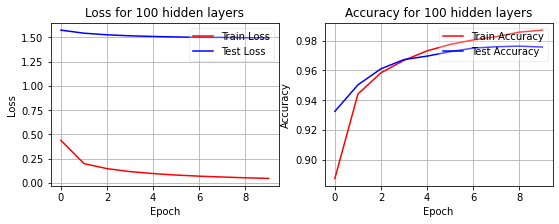

In [43]:
train_loss = np.zeros(epoch)
train_accuracy = np.zeros(epoch)

test_loss = np.zeros(epoch)
test_accuracy = np.zeros(epoch)
WiderMLP(100)

0/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

0/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

1/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

2/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

3/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

4/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

4/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

5/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

5/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

6/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

6/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

7/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

7/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

8/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

8/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

9/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

9/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

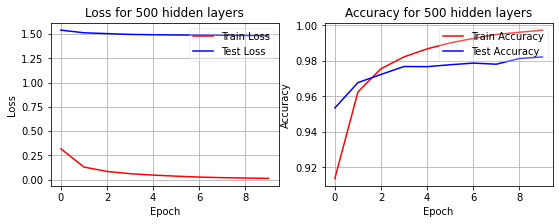

In [44]:
train_loss = np.zeros(epoch)
train_accuracy = np.zeros(epoch)

test_loss = np.zeros(epoch)
test_accuracy = np.zeros(epoch)

WiderMLP(500)

0/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

0/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

1/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

2/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

3/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

4/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

4/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

5/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

5/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

6/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

6/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

7/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

7/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

8/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

8/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

9/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

9/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

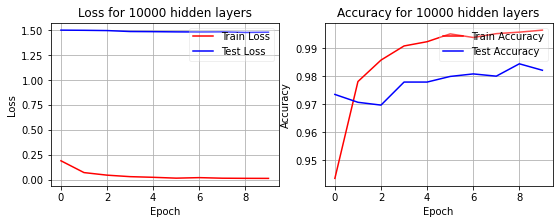

In [45]:
train_loss = np.zeros(epoch)
train_accuracy = np.zeros(epoch)

test_loss = np.zeros(epoch)
test_accuracy = np.zeros(epoch)

WiderMLP(10000)

0/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

0/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

1/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

2/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

3/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

4/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

4/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

5/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

5/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

6/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

6/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

7/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

7/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

8/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

8/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

9/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

9/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

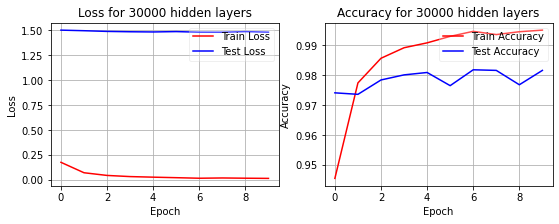

In [46]:
train_loss = np.zeros(epoch)
train_accuracy = np.zeros(epoch)

test_loss = np.zeros(epoch)
test_accuracy = np.zeros(epoch)

WiderMLP(30000)

0/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

0/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

1/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

2/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

3/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

4/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

4/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

5/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

5/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

6/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

6/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

7/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

7/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

8/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

8/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

9/10(t):   0%|          | 0/469 [00:00<?, ?it/s]

9/10(v):   0%|          | 0/79 [00:00<?, ?it/s]

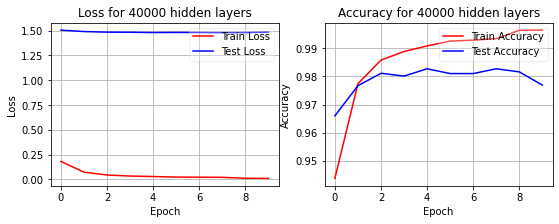

In [47]:
train_loss = np.zeros(epoch)
train_accuracy = np.zeros(epoch)

test_loss = np.zeros(epoch)
test_accuracy = np.zeros(epoch)

WiderMLP(40000)